<a href="https://colab.research.google.com/github/dafnesilla/IA_IB_AGODEC2024/blob/main/Final_Project_Training_a_Machine_Learning_model_on_medical_images_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 15.1M/15.1M [00:00<00:00, 76.8MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1

Inspecting dataset structure...

Directory: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1
Subdirectories: ['brain_tumor_dataset', 'no', 'yes']
Files: []

Directory: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/brain_tumor_dataset
Subdirectories: ['no', 'yes']
Files: []

Directory: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/brain_tumor_dataset/no
Subdirectories: []
Files: ['N11.jpg', 'no 97.jpg', '9 no.jpg', '1 no.jpeg', 'N26.JPG', '14 no.jpg', '39 no.jpg', 'N21.jpg', 'no 100.jpg', 'no 10.jpg', 'No18.jpg', '35 no.jpg', 'no 96.jpg', 'no 4.jpg', 'no 95.jpg', 'no 98.jpg', '41 no.jpg', '6 no.jpg', '47 no.jpg', 'No16.jpg', 'no 6.jpg', 'N6.jpg', 'no 91.jpeg', 'N19.JPG', 'N16.jpg', '8 no.jpg', 'No15.jpg', 'No21.jpg', 'no 89.jpg'

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.5024 - loss: 0.6822 - val_accuracy: 0.6579 - val_loss: 0.6180
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6132 - loss: 0.6505 - val_accuracy: 0.7237 - val_loss: 0.6060
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6616 - loss: 0.6147 - val_accuracy: 0.7632 - val_loss: 0.5546
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7363 - loss: 0.5594 - val_accuracy: 0.8026 - val_loss: 0.5439
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7925 - loss: 0.5194 - val_accuracy: 0.7763 - val_loss: 0.4713
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8129 - loss: 0.4621 - val_accuracy: 0.7763 - val_loss: 0.4562
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8005 - loss: 0.4148 - val_accuracy: 0.7895 - val_loss: 0.4667
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7954 - loss: 0.4460 - val_accuracy: 0.5789 - val_loss: 0.7298

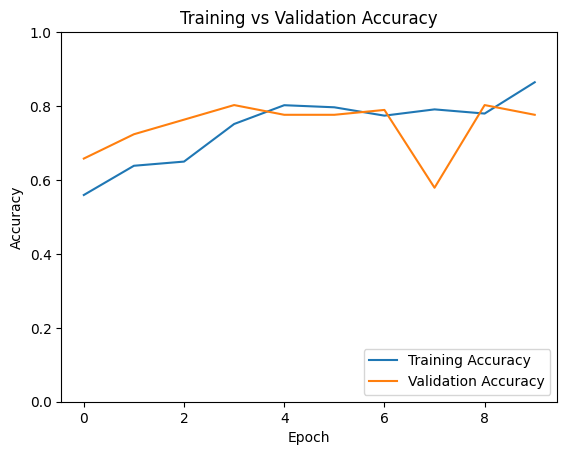

3/3 - 0s - 15ms/step - accuracy: 0.7763 - loss: 0.5353
Test Accuracy: 0.78
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The network predicts the class as 0, and the true class is: 0
The network predicts the class as 1, and the true class is: 1
The network predicts the class as 1, and the true class is: 1
The network predicts the class as 0, and the true class is: 1
The network predicts the class as 0, and the true class is: 1
The network predicts the class as 1, and the true class is: 1
The network predicts the class as 0, and the true class is: 0
The network predicts the class as 1, and the true class is: 1
The network predicts the class as 0, and the true class is: 0
The network predicts the class as 0, and the true class is: 1


In [1]:
# ---------------------------------------------------
# Team Information
# Sandra Janeth Arizpe Villanueva 2016782
# Santiago Ivan Martinez Martinez 1965156
# Dafne Sofia Reynosa Barbosa 2011575
# ---------------------------------------------------
"""
Team Details: Team 1
Artificial Intelligence Final Project
Project Title: Convolutional Neural Network for Image Classification
"""

# ---------------------------------------------------
# Libraries
# ---------------------------------------------------
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
import kagglehub

# ---------------------------------------------------
# Dataset Download and Inspection
# ---------------------------------------------------

# Download the dataset using KaggleHub
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")
print("Dataset downloaded to:", path)

# Inspect the dataset structure
print("\nInspecting dataset structure...")
for root, dirs, files in os.walk(path):
    print(f"\nDirectory: {root}")
    print("Subdirectories:", dirs)
    print("Files:", files)

# Adjust dataset_path based on inspection
dataset_path = os.path.join(path, "brain_tumor_dataset")  # Adjust if needed based on the printed structure

# ---------------------------------------------------
# Preprocessing: Loading Images and Labels
# ---------------------------------------------------

def load_images_and_labels(dataset_path):
    """
    Load images and corresponding labels from dataset_path.
    Assumes the dataset is organized with subfolders representing class names.
    """
    images = []
    labels = []
    class_names = os.listdir(dataset_path)  # Folder names as class names
    class_mapping = {name: idx for idx, name in enumerate(class_names)}  # Map class names to IDs
    print("Class Mapping:", class_mapping)

    for class_name, class_id in class_mapping.items():
        class_folder = os.path.join(dataset_path, class_name)
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
            if image is not None:
                resized_image = cv2.resize(image, (28, 28))  # Resize to 28x28
                images.append(resized_image)
                labels.append(class_id)

    return np.array(images), np.array(labels), class_mapping

# Load images and labels
images, labels, class_mapping = load_images_and_labels(dataset_path)

# Normalize images
images = images / 255.0

# Split into training (70%) and testing (30%)
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.3, random_state=42
)

# Reshape images to include channel dimension for CNN
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Display dataset details
print("Training Images Shape:", train_images.shape)
print("Training Labels Length:", len(train_labels))
print("Testing Images Shape:", test_images.shape)
print("Testing Labels Length:", len(test_labels))

# ---------------------------------------------------
# CNN Model Definition
# ---------------------------------------------------

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_mapping), activation='softmax')  # Output layer matches number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ---------------------------------------------------
# CNN Model Training
# ---------------------------------------------------

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)

# ---------------------------------------------------
# CNN Accuracy Results
# ---------------------------------------------------

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title("Training vs Validation Accuracy")
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

# ---------------------------------------------------
# Predictions with the Trained CNN
# ---------------------------------------------------

# Perform predictions on test images
predictions = model.predict(test_images)

# Display results for 5 sample predictions
sample_indices = [1, 50, 40, 25, 10, 22, 44, 22, 38, 29]
for i in sample_indices:
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    print(f"The network predicts the class as {predicted_label}, and the true class is: {true_label}")
